# Input information for the Be star project

## Mounting the Shared Google Drive and navigate to proper directory

In [ ]:
! git clone https://github.com/folsomcp/specpolFlow.git

Cloning into 'specpolFlow'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 323 (delta 136), reused 259 (delta 85), pack-reused 0
Receiving objects: 100% (323/323), 6.20 MiB | 11.41 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS

/content/drive/Shareddrives/BeStarsMiMeS


In [ ]:
pwd

'/content/drive/Shareddrives/BeStarsMiMeS'

## Using Panda to read in the information spreadsheet

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
import specpolFlow as pol
import matplotlib.pyplot as plt
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

loading specpolFlow package
importing specpolFlow.iolsd


In [ ]:
!ls

'BeStars Notebooks'		   RanNoise
 inlsd.dat			   specpolFlow
 LSD				  'Star LSD Profiles.pdf'
 MaskCleanedAsif		   Synth-codes
 mask_federico_test		   Synth-diskint-spectra
 Masks				   Synth-hybrid-spectra
 MaterialPortedOverFromOldFolder   Synth-local-spectra
 Models.pdf			   TelluricContamination.pdf
 NormalizedSpectra		   TelluricContamination_test.pdf
'Normalized Spectra.pdf'	   VALD-LongList
 outModelSpec.dat		   VALD-ShortList-AtmModels
 ProfilesCleanedAsif


In [ ]:
!pwd
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')

# Get the name of all of the sheets in the spreadsheet file
print(spreadsheet.worksheets())

# Select the sheet that we want
worksheet = spreadsheet.worksheet("Stars")

# get_all_values gives a list of rows.
rows = worksheet.get_all_records()
print(rows[0:2])

# Put the sheet containing the target information into a 
import pandas as pd
StarData = pd.DataFrame.from_records(rows)

/content/drive/Shareddrives/BeStarsMiMeS
[<Worksheet 'Stars' id:0>, <Worksheet 'Observations' id:1928804941>, <Worksheet 'Potentially Missing Stars' id:1093302803>, <Worksheet 'ListOfModels' id:543895816>]
[{'HD': 6226, 'Name': 'hd6226', 'Nobs': 1, 'T': 15000, 'log(g)': 4, 'ModelCode': 'T15000g40', 'Adopted-vsini': 120, 'Notes': ''}, {'HD': 7636, 'Name': 'hd7636', 'Nobs': 2, 'T': 15000, 'log(g)': 4, 'ModelCode': 'T15000g40', 'Adopted-vsini': 220, 'Notes': ''}]


In [ ]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Notes
0,6226,hd6226,1,15000,4.0,T15000g40,120.00,
1,7636,hd7636,2,15000,4.0,T15000g40,220.00,
2,10144,hd10144,1,20000,3.5,T20000g35,245.31,
3,10516,hd10516,1,25000,4.0,T25000g40,382.04,
4,11415,hd11415,1,18000,4.0,T18000g40,48.00,
...,...,...,...,...,...,...,...,...
73,217891,hd217891,5,15000,3.0,T15000g30,95.00,
74,221507,hd221507,1,10500,4.0,T10500g40,40.00,
75,224686,hd224686,2,13000,4.0,T13000g40,286.16,
76,239712,hd239712,1,21000,4.0,T21000g40,304.86,


For Marisol: Practice with using Pandas.
* Use panda to calculate the total number of observations (Nobs is the number of observation per star)
* Use panda to calculate the average number of observation per star
* Use panda to find the number of observation for the star "hd224686"
* Use panda to see whether the star "hd37022" is part of the list of stars. 

###Pandas DataFrame Overview:
To use Pandas, you must include the following in the code:
* import pandas as pd
 * This way pandas can be used to retrieve files, such as spreasheets.

To access other files, pandas must access the dataframe using the following code:
* df = pd.DataFrame(...) 
 * _Note that df can be changed, but it is the most common way to store an accessed file (df means dataframe)_

After retriving the data from the worksheet, you can access the columns of that worksheet by typing df._ColumnName_
* By doing the step above, a list of values from that column will appear and is ready to analyze. 
 * Note that these values do not have the index. 

In [ ]:
import pandas as pd
import statistics

def s_info(x) :
  ''' Tells the user if the star is in the list and gives related information '''
  potential_star = next((item for item in rows if item["Name"] == x ), None)
  if potential_star == None:
    print("Star", x , "is not in the list of stars.")
  else:
    print(potential_star)
    return potential_star
  
# Part One 
wsheet = spreadsheet.worksheet("Stars")
df = pd.DataFrame(wsheet.get_all_records())

observ = df.Nobs
tot_observ = sum(observ)
print("There were a total of", tot_observ, "observations.")

# Part Two 
avg_observ = round(statistics.mean(observ), 2)
print("There is an average of", avg_observ, "observations per star.")

# Part Three
first_star = s_info("hd224686")

fst_star_obs = first_star["Nobs"]

fst_star  = first_star["Adopted-vsini"]
print(fst_star)

print("There are", fst_star_obs, "observations for Star hd224686.")

# Part Four
second_star = s_info("hd37022")

There were a total of 198 observations.
There is an average of 2.54 observations per star.
{'HD': 224686, 'Name': 'hd224686', 'Nobs': 2, 'T': 13000, 'log(g)': 4, 'ModelCode': 'T13000g40', 'Adopted-vsini': 286.16, 'Notes': ''}
286.16
There are 2 observations for Star hd224686.
Star hd37022 is not in the list of stars.


### Opening Google Sheets with Pandas:
You must authorize Google to access data in your Google Drive by typing the following code:
>from google.colab import auth
>auth.authenticate_user()
>
>import gspread
>from google.auth import default
>creds, _ = default()
>
>gc = gspread.authorize(creds)

To open a Google Sheet where the user is not the owner, it must be opened by url.
* It is a weird part of Pandas, but it does work.

From there, a table can be created in Python with the code on the fourth line in the cell below. 
* Column Names can be chosen and the values can be pulled from a worksheet in Google Sheets.

In [ ]:
new_sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1i8by_3LF0GRP7qbjOUL7XpCPIoo5lFQyyAoMWlELzuk/edit?usp=sharing')
vsini_wsheet = new_sheet.worksheet("CorrectedVsini")

vrecords = pd.DataFrame(vsini_wsheet.get_all_records(), columns = ["Name", "ModelCode", "vsiniCorrected"])

In [ ]:
vrecords

,Name,ModelCode,vsiniCorrected
0,hd6226,T15000g40,120.00
1,hd7636,T15000g40,220.00
2,hd7636,T15000g40,220.00
3,hd10144,T20000g35,245.31
4,hd10516,T25000g40,382.04
...,...,...,...
196,hd221507,T10500g40,40.00
197,hd224686,T13000g40,286.16
198,hd224686,T13000g40,286.16
199,hd239712,T21000g40,304.86


### Pandas groupby( ) Function:
Pandas has a cool feature that can group data based on different criteria, such as name, size, etc. 

The grouping must be done by a column name, it will automatically be sorted in ascensing or alphabetical order. If this feature is not desired, it must be stated.
* This can be seen below where "sort = False"
* If there are numercal values being grouped, it must be stated how they will be grouped. 
 * Examples include .max( ), .mean( ), .sum( ), etc. 

In [ ]:
#Grouping Duplicates by star name

group_by_name = vrecords.groupby(["Name"], sort=False).max()

new_vrecords = pd.DataFrame(group_by_name, columns = ["ModelCode", "T", "log(g)", "vsiniCorrected"])   

In [ ]:
new_vrecords

,ModelCode,T,log(g),vsiniCorrected
Name,,,,
hd6226,T15000g40,NaN,NaN,120.00
hd7636,T15000g40,NaN,NaN,220.00
hd10144,T20000g35,NaN,NaN,245.31
hd10516,T25000g40,NaN,NaN,382.04
hd11415,T18000g40,NaN,NaN,48.00
...,...,...,...,...
hd217891,T15000g30,NaN,NaN,95.00
hd221507,T10500g40,NaN,NaN,40.00
hd224686,T13000g40,NaN,NaN,286.16


In [ ]:
def star_temp():
  ''' Returns the tempurature of the star based on the model code '''
  i = 0
  while i <= 77 :
    model_code = new_vrecords["ModelCode"][i] 
    temp = float(model_code[1:-3])
    new_vrecords['T'][i] = temp
    i = i + 1

star_temp()

#new_vrecords is now updated

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
def log_g():
  ''' Returns log(g) and adds it to new_vrecords '''
  i = 0
  while i <= 77 :
    model_code = new_vrecords["ModelCode"][i] 
    log = float(model_code[-2:])
    new_vrecords['log(g)'][i] = log*.1
    i = i + 1 
  
log_g()
new_vrecords = new_vrecords.reset_index()    #This resets the index so that it starts at 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Adding Data to Another Table using Pandas: 
The data from one table must be stored, in this case, I stored it using the variable _vrecords_table_. 

From there, the values in the column names must be assigned the values in the other table.
*  Examples can be seen in the code cell below 

In [ ]:
vrecords_table = pd.DataFrame(new_vrecords)

#Transferring data from new_vrecords to StarData

StarData["T"] = vrecords_table["T"] 
StarData["log(g)"] = vrecords_table["log(g)"]
StarData["ModelCode"] = vrecords_table["ModelCode"]
StarData["Adopted-vsini"] = vrecords_table["vsiniCorrected"]

In [ ]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Notes
0,6226,hd6226,1,15000.0,4.0,T15000g40,120.00,
1,7636,hd7636,2,15000.0,4.0,T15000g40,220.00,
2,10144,hd10144,1,20000.0,3.5,T20000g35,245.31,
3,10516,hd10516,1,25000.0,4.0,T25000g40,382.04,
4,11415,hd11415,1,18000.0,4.0,T18000g40,48.00,
...,...,...,...,...,...,...,...,...
73,217891,hd217891,5,15000.0,3.0,T15000g30,95.00,
74,221507,hd221507,1,10500.0,4.0,T10500g40,40.00,
75,224686,hd224686,2,13000.0,4.0,T13000g40,286.16,
76,239712,hd239712,1,21000.0,4.0,T21000g40,304.86,


## Using Pandas to Analyze Observations Worksheet

In [ ]:
#For new worksheet "Observations"

!pwd
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')

# Get the name of all of the sheets in the spreadsheet file
print(spreadsheet.worksheets())

# Select the sheet that we want
worksheet = spreadsheet.worksheet("Stars")
obs_wsheet = spreadsheet.worksheet("Observations")

# get_all_values gives a list of rows.
rows = worksheet.get_all_records()
obs_rows = obs_wsheet.get_all_records()

# Put the sheet containing the target information into a table
import pandas as pd

Observations = pd.DataFrame.from_records(obs_rows)
Stars = pd.DataFrame.from_records(rows)

/content/drive/Shareddrives/BeStarsMiMeS
[<Worksheet 'Stars' id:0>, <Worksheet 'Observations' id:1928804941>, <Worksheet 'Potentially Missing Stars' id:1093302803>, <Worksheet 'ListOfModels' id:543895816>]


In [ ]:
Observations

,F,HDOrder,ObsOrder,Name,LSDfileName,NameAsif,NameOfMask,HarpsFlag,NameOfSymbolicLinkToData,vsiniMean,vrad,vradCorrected
0,185,1,1,hd6226,hd6226_1.lsd.s,hd6226_1,mask_T15000g40lamb3700_9000.dat,0,hd6226_11AP14_1310132pnv.s,110.34,-60.297909,-70.000000
1,193,2,1,hd7636,hd7636_1.lsd.s,hd7636_1,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1314767pnv.s,230.00,0.000000,0.000000
2,194,2,2,hd7636,hd7636_2.lsd.s,hd7636_2,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1316457pnv.s,230.00,0.000000,0.000000
3,2,3,1,hd10144,hd10144_1.lsd.s,hd10144_1,mask_T20000g35lamb3700_9000.dat,1,hd10144_187.D-0917A_2011-12-11_01_pnv.s,245.31,12.981952,12.981952
4,3,4,1,hd10516,hd10516_1.lsd.s,hd10516_1,mask_T25000g40lamb3700_9000.dat,0,hd10516_11AP14_1311181pnv.s,382.04,-60.990786,-60.990786
...,...,...,...,...,...,...,...,...,...,...,...,...
196,137,74,1,hd221507,hd221507_1.lsd.s,hd221507_1,mask_T10500g40lamb3700_9000.dat,1,hd221507_187.D-0917A_2012-07-19_01_pnv.s,20.00,0.000072,0.000072
197,140,75,1,hd224686,hd224686_1.lsd.s,hd224686_1,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-09_01_pnv.s,286.16,11.694301,11.694301
198,141,75,2,hd224686,hd224686_2.lsd.s,hd224686_2,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-12_01_pnv.s,286.16,8.724928,8.724928
199,145,76,1,hd239712,hd239712_1.lsd.s,hd239712_1,mask_T21000g40lamb3700_9000.dat,0,hd239712_11BP14_1331344pnv.s,304.86,-0.002959,-0.002959


In [ ]:
Stars

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Notes
0,6226,hd6226,1,15000,4.0,T15000g40,120.00,
1,7636,hd7636,2,15000,4.0,T15000g40,220.00,
2,10144,hd10144,1,20000,3.5,T20000g35,245.31,
3,10516,hd10516,1,25000,4.0,T25000g40,382.04,
4,11415,hd11415,1,18000,4.0,T18000g40,48.00,
...,...,...,...,...,...,...,...,...
73,217891,hd217891,5,15000,3.0,T15000g30,95.00,
74,221507,hd221507,1,10500,4.0,T10500g40,40.00,
75,224686,hd224686,2,13000,4.0,T13000g40,286.16,
76,239712,hd239712,1,21000,4.0,T21000g40,304.86,


## About star_info( ) :
This function takes a string of the star name and prints all of the rows from the Observations worksheets.  

The first condition is finding out if the star exist in the list of stars in the Stars worksheet using the next( ) function and storing the value in poss_star
* If poss_star has a value of _None_, then the following sentence is printed stating that the star is not in the list of stars
 * If poss_star has another value, meaning that the name of the star matches a name from the list of stars, it will go into a loop. 
 * This _for loop_ goes through all of the rows in the Observations worksheet and prints all of the rows that have the same star name. This works well for stars that have multiple observations.

In addition to showing all of the rows from the Observations worksheet that match the name of the star, you can verify if the number of observations is corrected by comparing the highest value of "ObsOrder" to "Nobs".

In [ ]:
def star_info(name):
  ''' Tells the user if the star is in the list and gives information on the observations'''
  poss_star = next((item for item in rows if item["Name"] == name ), None)
  
  if poss_star == None :
    print("Star", name, "is not in the list of stars.")
  else:  
    #print("Information from Stars worksheet:")
    #print(poss_star)
    #print("Information from Observations worksheet:")
    values = []
    for item in obs_rows:
      if item["Name"] == name : 
        values.append(item)
    return values

### Testing out different stars with various numbers of observations

star_info("hd12345") 
star_info("hd23302") 


Star hd12345 is not in the list of stars.


[{'F': 143,
  'HDOrder': 8,
  'HarpsFlag': 0,
  'LSDfileName': 'hd23302_1.lsd.s',
  'Name': 'hd23302',
  'NameAsif': 'hd23302_1',
  'NameOfMask': 'mask_T15000g35lamb3700_9000.dat',
  'NameOfSymbolicLinkToData': 'electra_L112N02_28nov11_01_pnv.s',
  'ObsOrder': 1,
  'vrad': 4.0865709,
  'vradCorrected': 4.0865709,
  'vsiniMean': 180.91},
 {'F': 142,
  'HDOrder': 8,
  'HarpsFlag': 0,
  'LSDfileName': 'hd23302_2.lsd.s',
  'Name': 'hd23302',
  'NameAsif': 'hd23302_2',
  'NameOfMask': 'mask_T15000g35lamb3700_9000.dat',
  'NameOfSymbolicLinkToData': 'electra_L112N02_23jan12_01_pnv.s',
  'ObsOrder': 2,
  'vrad': 4.0464181,
  'vradCorrected': 4.0464181,
  'vsiniMean': 180.91}]

##Checking Existing Files
The following code is supposed to go through the column "LSDFileNames" in the Observations spreadsheet and check to see if the file exists in the folder "Profiles Cleaned Asif." 
* If the file is not in the folder, it will print "File (blank) is missing"
* If the file is in the folder, it will not print anything

I used a for loop and added a string to the absolute path of the file to locate it. USing that path, I can use the os program and the "isfile" feature to locate the file.

In [ ]:
### Checking to see if a file exists

import os 

#os.path.isfile('/content/drive/Shareddrives/BeStarsMiMeS/ProfilesCleanedAsif/hd239712_1.lsd.s') #This works by itself

lsd_fname = []
for item in Observations["LSDfileName"]:
  lsd_fname.append(item)

#print(lsd_fname)  # This is a list of all of the files in the document
#print("There are", len(lsd_fname), "files") 


for dok in lsd_fname:
  path = '/content/drive/Shareddrives/BeStarsMiMeS/ProfilesCleanedAsif/' + str(dok)
  avail_file  = os.path.isfile(path)
  if avail_file != True: 
    print("File", dok, "is missing")


## Multi-Page PDFs


#### **Robin's plot_lsds( ) Function:** 
The LSD profiles come from a folder in the BeStarsMiMeS shared drive called "ProfilesCleanedAsif".

The function below complies the LSD profiles for each star, if there is more than one observation for a star, there will be multiple lines on the plot. 
* The dashed lines on each side of a peak is the vsini of the star 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fc97047d0>)

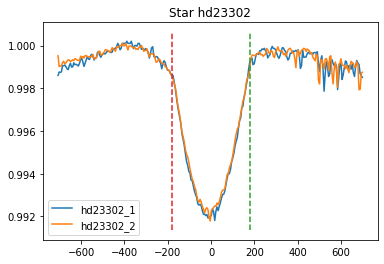

In [ ]:
#lsd plotting, courtesy of robin

def plot_lsds(starname, figsize=(10,10), **kwargs):
  '''
  Plots every lsd profile together of a star.
  '''
  fig, ax = plt.subplots()
  obs = Observations[Observations["Name"] == starname]
  for index, row in obs.iterrows():
    lsd = pol.iolsd.read_lsd('/content/drive/Shareddrives/BeStarsMiMeS/ProfilesCleanedAsif/' + row['LSDfileName'])
    lsd = lsd - row['vradCorrected']
    ax.plot(lsd.vel, lsd.specI, label = row['LSDfileName'].split('.')[0])
  Star = Stars[Stars['Name'] == starname]
  vsini = Star['Adopted-vsini']
  ymin, ymax = ax.get_ylim()
  ax.plot([vsini, vsini], [ymin, ymax], linestyle='dashed')
  vsini = vsini * -1
  ax.plot([vsini, vsini], [ymin, ymax], linestyle='dashed')
  ax.legend()
  ax.set_title('Star {}'.format(starname))
  return fig, ax

data = plot_lsds("hd23302")
data

#### **Mutli-page PDFs for the LSD Profiles:**

Using Pandas _(imported as pd)_ and PDF pages, the figures from the function above can be saved into a single PDF using a for loop. 
* This for loop goes through the list of star names in the "00-InputInformation" spreadsheet. 
 * It went through the list of star names using Pandas to read the worksheet "Stars" and saving the column "Name" to the variable **star_names**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

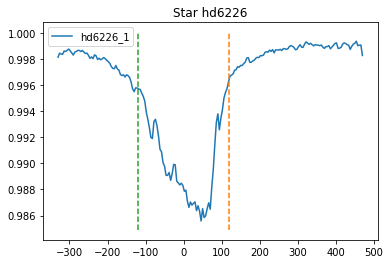

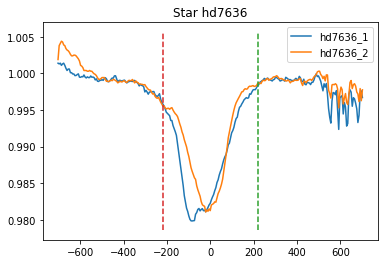

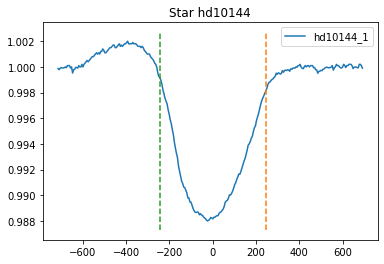

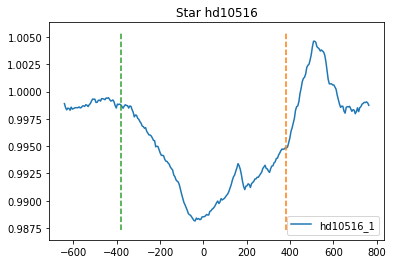

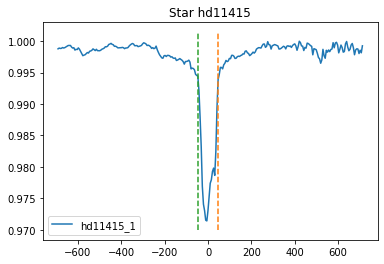

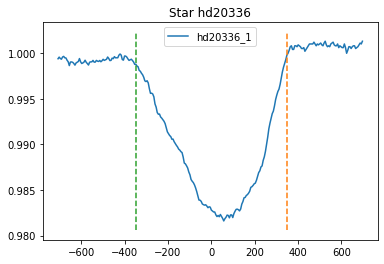

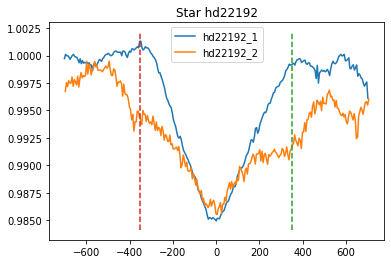

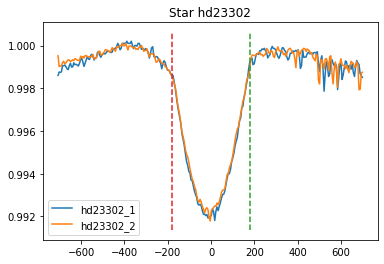

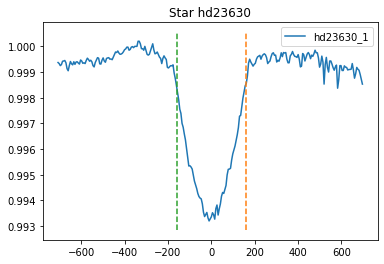

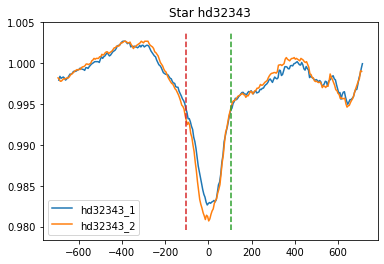

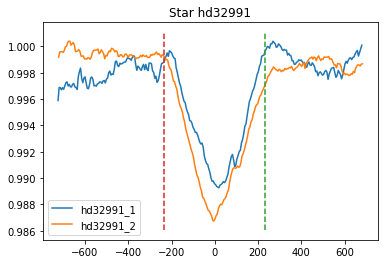

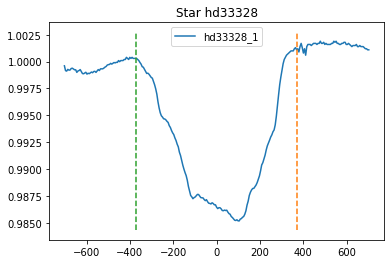

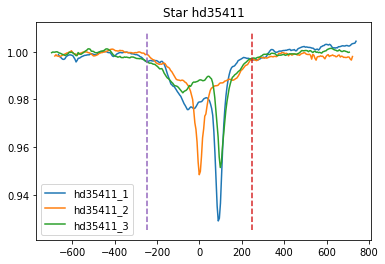

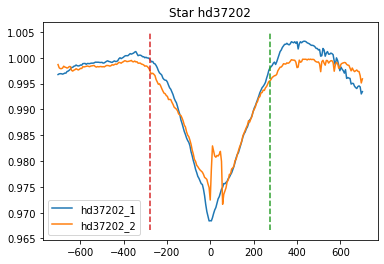

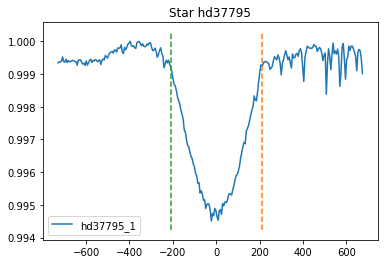

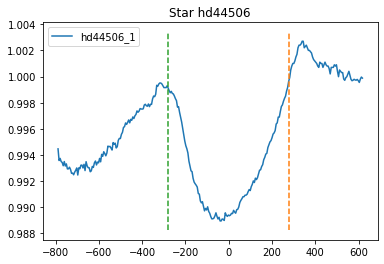

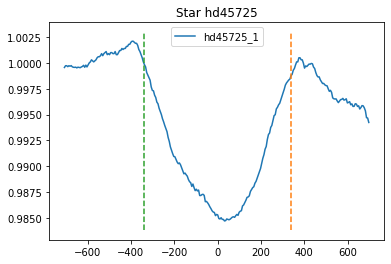

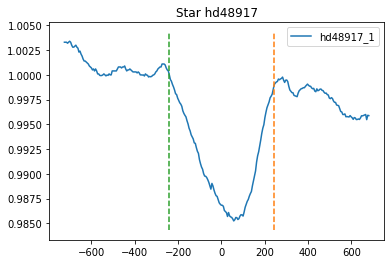

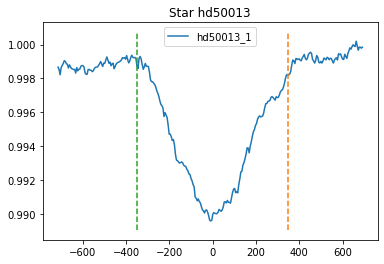

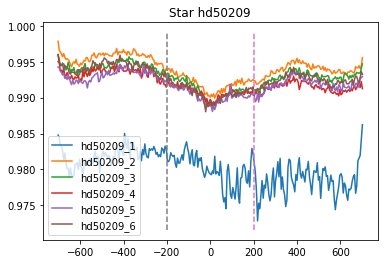

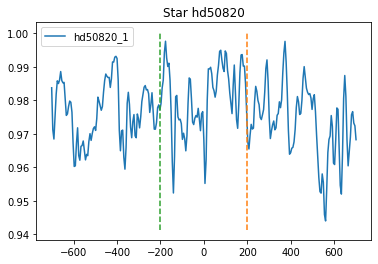

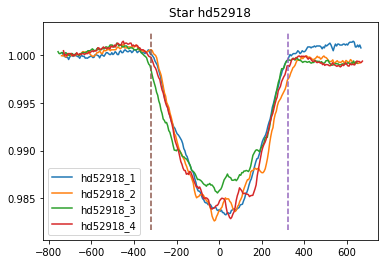

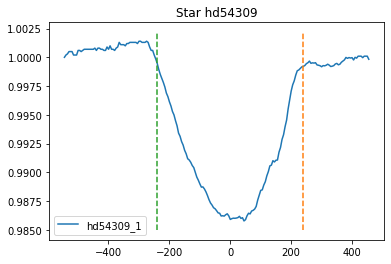

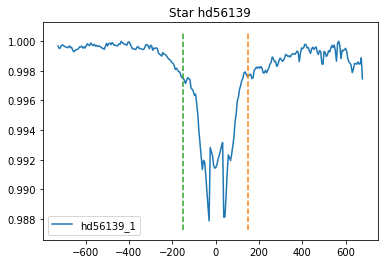

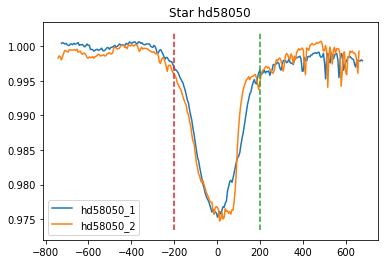

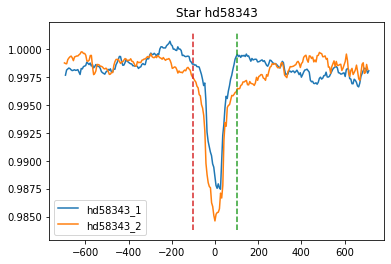

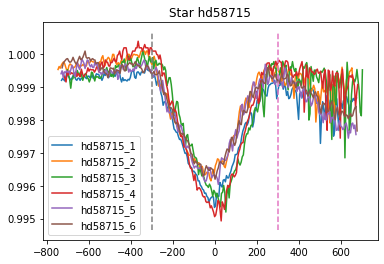

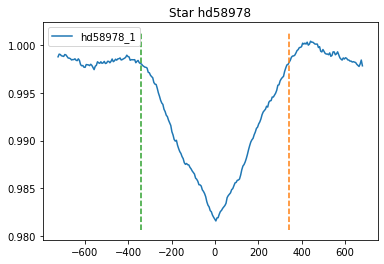

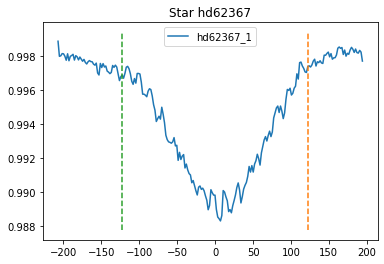

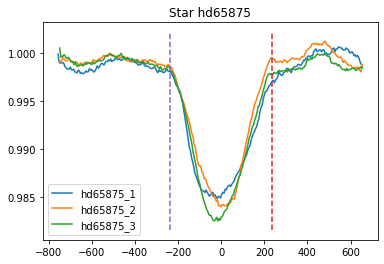

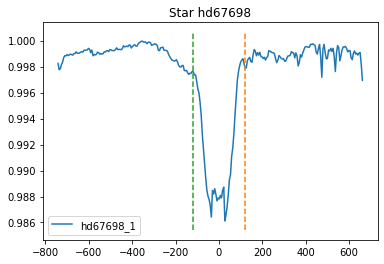

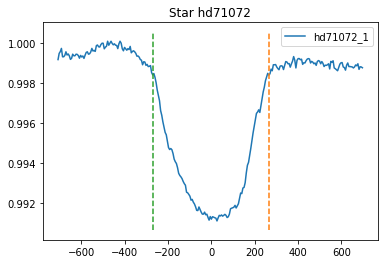

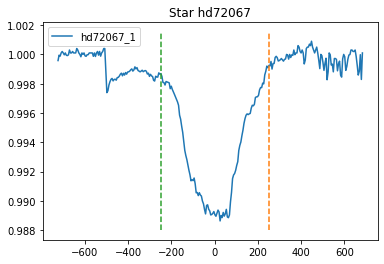

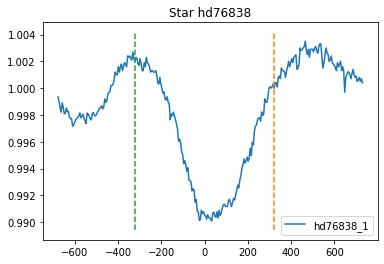

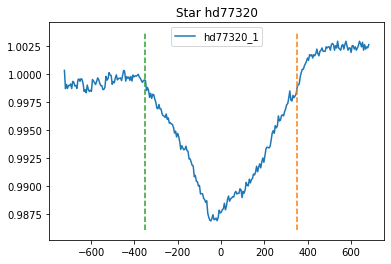

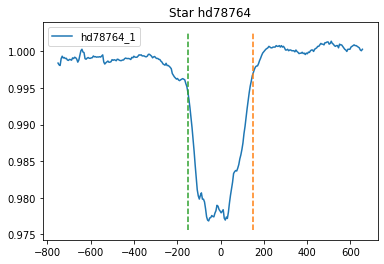

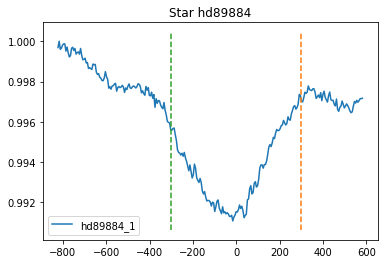

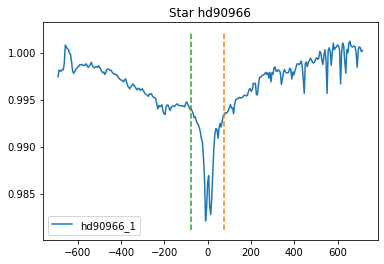

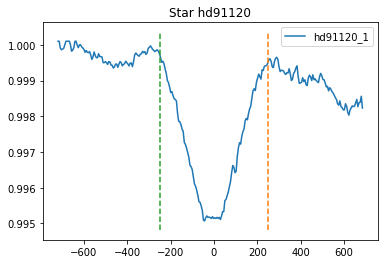

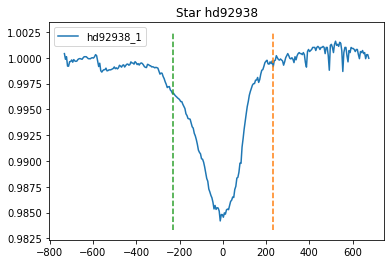

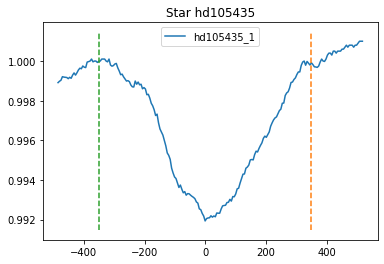

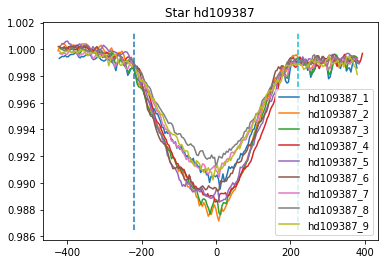

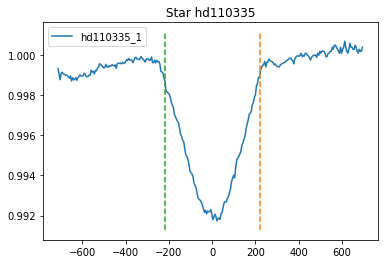

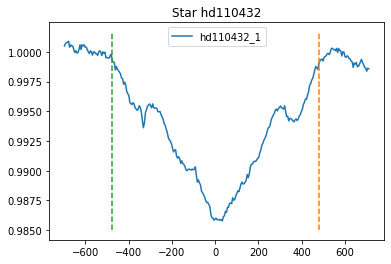

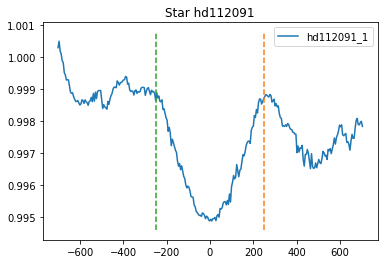

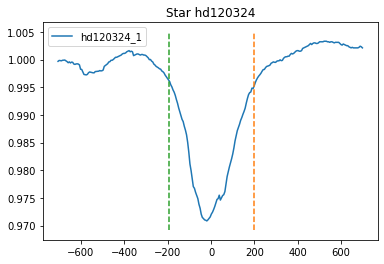

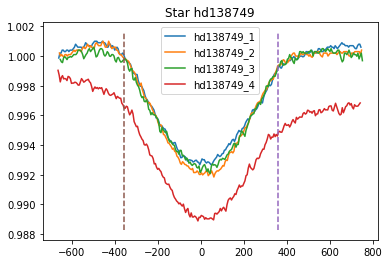

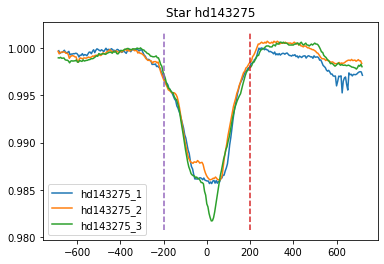

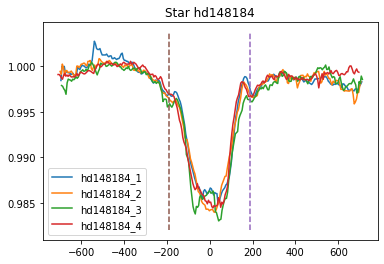

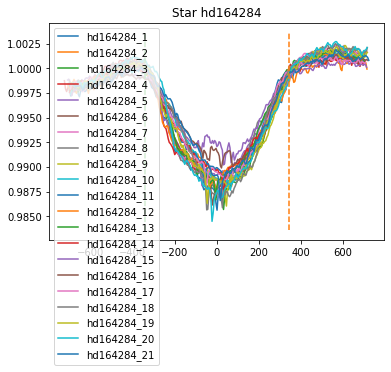

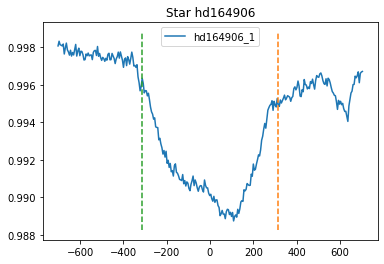

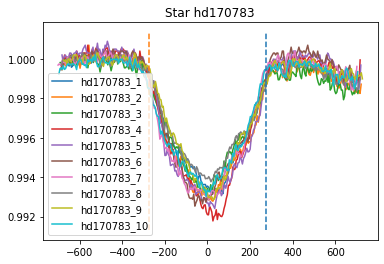

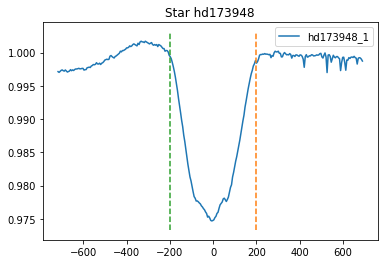

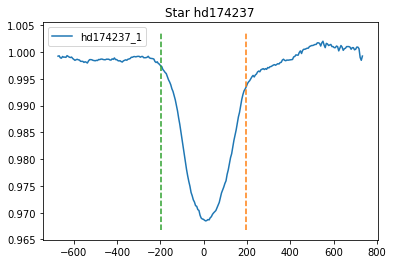

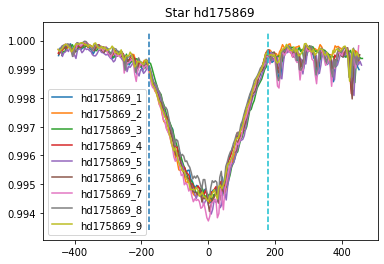

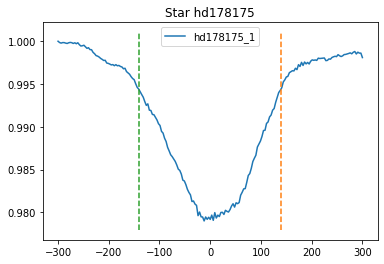

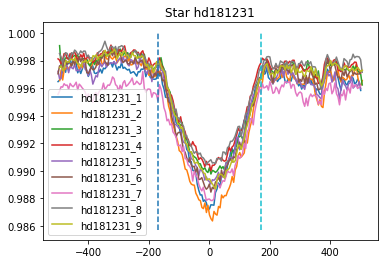

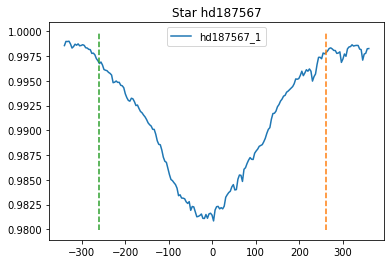

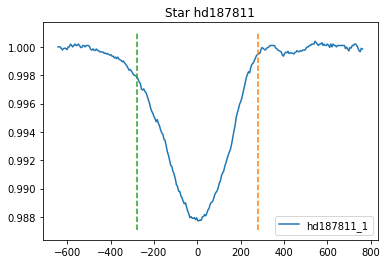

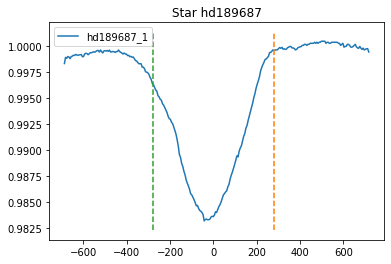

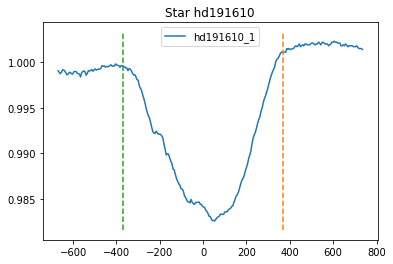

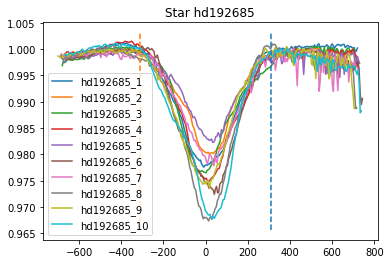

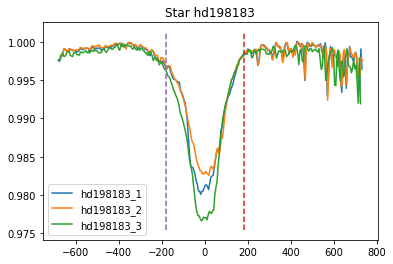

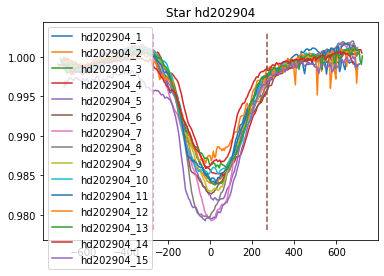

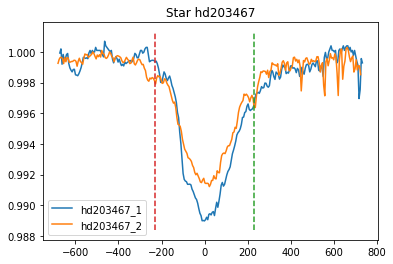

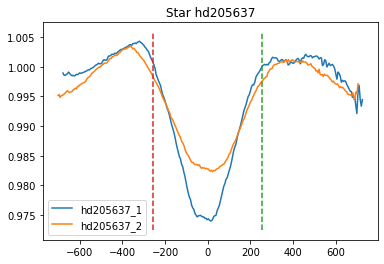

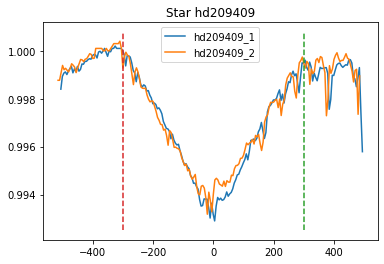

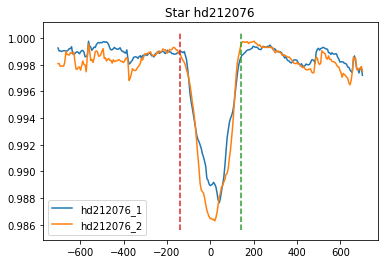

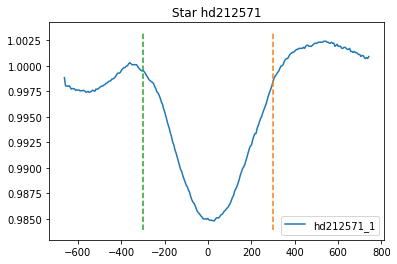

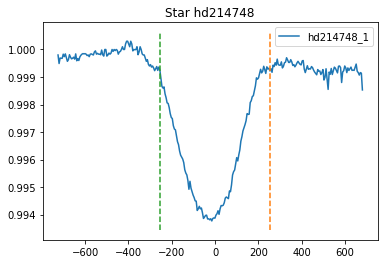

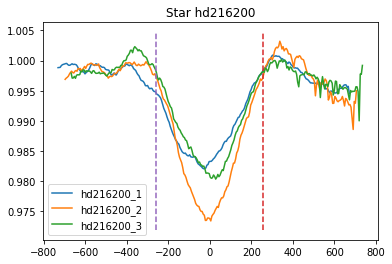

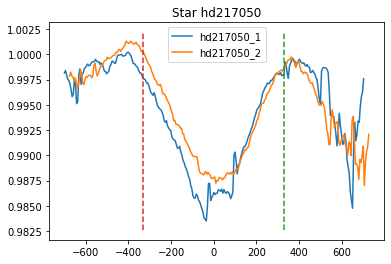

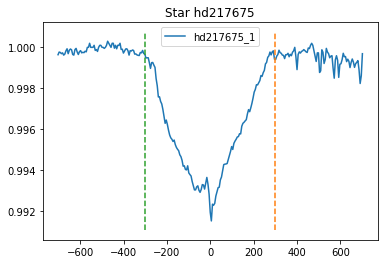

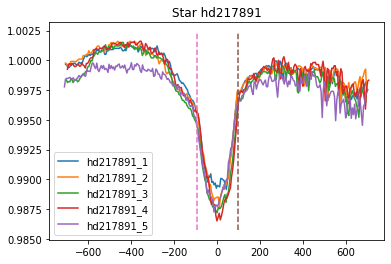

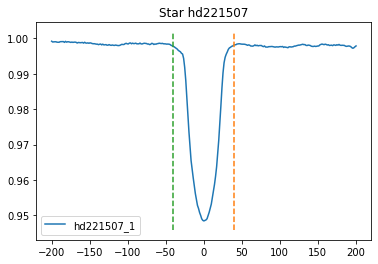

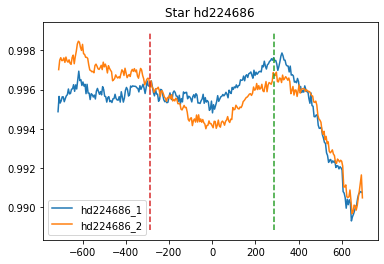

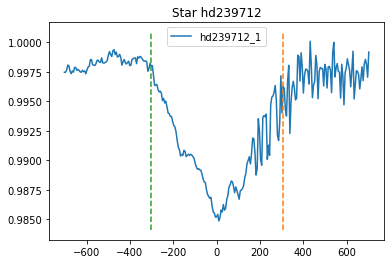

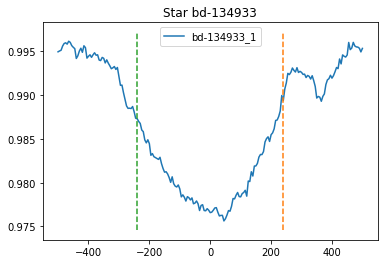

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

gspread = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')
gsheet = gspread.worksheet("Stars")
g_records = gsheet.get_all_records()
fn = pd.DataFrame(g_records)

#analyzing spreadsheet with Pandas
star_names = fn.Name

with PdfPages('Star LSD Profiles.pdf') as pdf:

  for name in star_names:
      fig, data = plot_lsds(name)
      plt.close
      pdf.savefig() 

#Note: If an error pops up the first time it runs, go back and run the function above